<a href="https://colab.research.google.com/github/bupacone/STAT_Projects/blob/main/STAT112_Freshman_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STAT 112 Crime Data
###How We Cleaned The Data with Python Libraries: Numpy and Pandas
#####Hi, This data is completely random. It shows no correlation and no conclusions can be drawn. This is hand manipulated data. **It cannot be related real life**. The purpose of the data is to understand whether the STAT-112 (Freshman 1st semester) course is understood or not.

#####Thanks,

#####by B.S. Küçük


In [37]:
# Importing data cleaning libraries
import numpy as np
import pandas as pd

# We load the excel file
file_path = "/content/Crime.xlsx"
data = pd.read_excel(file_path) # reading excel file

In [ ]:
print(data.dtypes)  # Display the data types of each column
print(data.info())  # Display the data info
print(data.head())  # Display the first five rows

In [39]:
data.columns = data.iloc[1]  # Set the second row as the column headers
data = data.drop([0, 1])     # Drop the first two rows
data.reset_index(drop=True, inplace=True) # resets the index of the data, directly on the original DataFrame (inplace)
print(data.dtypes)
print(data.describe())
print(data.info())
print(data.head())
print(data.tail()) # Display the entire data with some print statements

1
YEAR                                  object
STATE NAME                            object
//Population                          object
Crime_Type                            object
Arrests                               object
VICTIMS                               object
Income                                object
Education_Level                       object
Unemployment_Rate                     object
!!Urbanization                        object
Number of property crimes reported    object
CRIME_RATE                            object
dtype: object
1       YEAR STATE NAME  //Population Crime_Type  Arrests  VICTIMS  Income  \
count    121        121           121        120      121      121     120   
unique    24          5           115          4       42       33      63   
top     2005      Texas      30616823   Property    87654    65432   79000   
freq       6         25             3         59        7        7       4   

1      Education_Level  Unemployment_Rate !!Urbanizat

In [40]:
# Fixing column names and data types
data.columns = [
    "Date", "State", "Population", "Crime_Type", "Arrests", "Victims",
    "Income", "Education_Level", "Unemployment_Rate", "Urbanization",
    "Property_Crimes", "Crime_Rate"
]

In [41]:
# Finding Missing Data
print(data.isnull().sum())

Date                 0
State                0
Population           0
Crime_Type           1
Arrests              0
Victims              0
Income               1
Education_Level      0
Unemployment_Rate    0
Urbanization         1
Property_Crimes      1
Crime_Rate           0
dtype: int64


In [ ]:
'''# Year Variable Corresponds to Date Time
data['Date'] = pd.to_datetime(data['Date'].astype(str) + '-01-01')
'''
data['Date'] = pd.to_datetime(data['Date'], format='%Y').dt.year # It does not affect anything but we put this. There is a chance we can want to use other date datatype


# Define a function to convert columns to numeric types while handling 'NA' values, this replace NAN values with blank ones.
def convert_to_numeric(column, is_float=False):
    if is_float:
        return pd.to_numeric(column.astype(str).str.replace(',', '.'), errors='coerce')
    else:
        return pd.to_numeric(column.astype(str).str.replace(',', ''), errors='coerce')
print(data.head()) #again checking and control the data
print(data.describe())
print(data.info())

In [43]:
# Finding All Misspelled Entries (in Categorical Variables)
print(data['State'].unique())
print(data['Education_Level'].unique())
print(data['Urbanization'].unique())
print(data['Crime_Type'].unique())

['California' 'Texas' 'Florida' 'New York' 'Pennsylvania']
['High School' 'College' 'High_School' 'COLLEGE']
['Urban' 'Suburban' 'SUBURBAN' 'URBAN' 'urban' ' Suburban' ' Urban' nan
 'Urban ' 'Suburban ']
['Violent' 'Property' nan 'VIOLENT' 'Vıolent']


In [44]:
# Make Numeric Variables
integer_columns = ['Population', 'Arrests', 'Victims', 'Income', 'Property_Crimes'] # Determine the integer columns
for col in integer_columns: # For every integer column
    data[col] = pd.to_numeric(data[col], errors='coerce') # Make it numeric

float_columns = ['Crime_Rate', 'Unemployment_Rate'] # Float Column List
for col in float_columns: # For every column
    data[col] = convert_to_numeric(data[col], is_float=True) # Make it float

# Correcting each categorical variable values.
# Correcting state names
data['State'] = data['State'].str.title().str.strip()

# Correct misspellings in Education_Level and standardize the formatting
data['Education_Level'] = data['Education_Level'].str.strip()
data['Education_Level'] = data['Education_Level'].str.replace('_', ' ').replace({
    'High_School': 'High School', 'Collegee': 'College', 'COLLEGE': 'College',
})

# Correct Urbanization variable to have proper case and fix known misspellings
data['Urbanization'] = data['Urbanization'].str.strip()
data['Urbanization'] = data['Urbanization'].str.title().replace({
    'Urba': 'Urban', 'URBAN': 'Urban', 'Suburb': 'Suburban',
    'SUBURBAN': 'Suburban', 'suburban': 'Suburban','urban': 'Urban',
})

# Correct case issues in Crime_Type and fix misspellings
data['Crime_Type'] = data['Crime_Type'].str.strip()
data['Crime_Type'] = data['Crime_Type'].str.title().replace({
    'Vıolent': 'Violent', 'VIOLENT': 'Violent', 'PROPERTY': 'Property',
    'property': 'Property', 'violent': 'Violent',
})

# Removing Duplicate Observations
data.drop_duplicates(inplace=True) # Changing main data with dropped version

# Display the cleaned and converted DataFrame
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 120
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               120 non-null    int64  
 1   State              120 non-null    object 
 2   Population         120 non-null    int64  
 3   Crime_Type         119 non-null    object 
 4   Arrests            120 non-null    int64  
 5   Victims            120 non-null    int64  
 6   Income             119 non-null    float64
 7   Education_Level    120 non-null    object 
 8   Unemployment_Rate  120 non-null    float64
 9   Urbanization       119 non-null    object 
 10  Property_Crimes    119 non-null    float64
 11  Crime_Rate         120 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 12.2+ KB
None
   Date         State  Population Crime_Type  Arrests  Victims   Income  \
0  2000    California    39512223    Violent    54231    65294  65000.0   
1  20

In [ ]:
##CHECKPOINT !!! WARNING !!!
# THIS CODE SHOULD NOT BE RUNNED
# this code gives the new version of the half-cleaned data as an excel file.
data.to_excel('/content/Crime_halfModified.xlsx', index=False)

#SECOND PHASE
### How We Deal with Missing Data Entries with Python Libraries: Pandas and NumPy

In [45]:
property_crimes_median = data['Property_Crimes'].median() # median value of income
property_crimes_mean = data['Property_Crimes'].mean() # mean value of income

# If the difference between median and mean is big, use the median to fill missing values
if np.abs(property_crimes_median - property_crimes_mean) / property_crimes_mean > 0.1:
    data['Property_Crimes'].fillna(property_crimes_median, inplace=True)
else:
    data['Property_Crimes'].fillna(property_crimes_mean, inplace=True)

'''# Remove observations with missing data in "Crime_Type"
data = data.dropna(subset=['Crime_Type'])''' # We do not use this but we tried it to look how our data would be changed

# Fill the missing data in "Crime_Type" with the mode of the column
crimetype_mode = data['Crime_Type'].mode()[0]
data.loc[data['Crime_Type'].isna(), 'Crime_Type'] = crimetype_mode

# Fill the missing data in "Urbanization" with the mode of the column
urbanization_mode = data['Urbanization'].mode()[0]
data.loc[data['Urbanization'].isna(), 'Urbanization'] = urbanization_mode

In [46]:
# to decide which approach we use, we calculated mean and median values of income
income_median = data['Income'].median() # median value of income
income_mean = data['Income'].mean() # mean value of income

# Using the median or mean if mean almost exactly close the median so use mean otherwise use the median.
if np.abs(income_median - income_mean) / income_mean > 0.1:
    data['Income'].fillna(income_median, inplace=True)
else:
    data['Income'].fillna(income_mean, inplace=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 120
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               120 non-null    int64  
 1   State              120 non-null    object 
 2   Population         120 non-null    int64  
 3   Crime_Type         120 non-null    object 
 4   Arrests            120 non-null    int64  
 5   Victims            120 non-null    int64  
 6   Income             120 non-null    float64
 7   Education_Level    120 non-null    object 
 8   Unemployment_Rate  120 non-null    float64
 9   Urbanization       120 non-null    object 
 10  Property_Crimes    120 non-null    float64
 11  Crime_Rate         120 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 12.2+ KB
None


In [ ]:
# Information data
print(data.dtypes)
print(data.describe())
print(data.info())
print(data.head())
print(data.tail())

Date                   int64
State                 object
Population             int64
Crime_Type            object
Arrests                int64
Victims                int64
Income               float64
Education_Level       object
Unemployment_Rate    float64
Urbanization          object
Property_Crimes      float64
Crime_Rate           float64
dtype: object
              Date    Population        Arrests        Victims         Income  \
count   120.000000  1.200000e+02     120.000000     120.000000     120.000000   
mean   2011.500000  2.812840e+07  163238.300000  191218.516667   90092.436975   
std       6.951211  9.982926e+06  108728.825696  116708.645384   22323.816877   
min    2000.000000  1.280199e+07   20123.000000   34567.000000   48000.000000   
25%    2005.750000  2.137673e+07   65432.000000   85471.250000   73750.000000   
50%    2011.500000  2.857113e+07  132098.500000  170987.500000   89546.218487   
75%    2017.250000  3.394171e+07  253432.000000  296076.000000  109000.

In [47]:
#finding outliers
def identify_outliers(df, columns): # we create new python function
    outliers = {} # dict of outliers it is empty at the beginning
    for column in columns:
        Q1 = df[column].quantile(0.25) # definition of quartile 1
        Q3 = df[column].quantile(0.75) # definition of quartile 3
        IQR = Q3 - Q1 # interquartile range
        lower_bound = Q1 - 1.5 * IQR # for finding unusual case we create the
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)] # if values in the columns are lower than Q1 or bigger than Q3 return these for outliers
    return outliers

# list of numerical columns to check for outliers
numerical_columns = ['Population', 'Arrests', 'Victims', 'Income', 'Property_Crimes', 'Crime_Rate'] # we made list because we should determine strict variables.
unemployment = ['Unemployment_Rate'] # we separate unemployment rate because we will look this separately. This column is important so we ignore if this numerical variable has a outlier

# Applying the function for first group and second group
outliers = identify_outliers(data, numerical_columns)
outliers2 = identify_outliers(data, unemployment)

# displaying the outliers
print(outliers) # checking have all numerical columns except unemployment rate outliers?
print()
print(outliers2) # checking has unemployment rate outliers?

{'Population': Empty DataFrame
Columns: [Date, State, Population, Crime_Type, Arrests, Victims, Income, Education_Level, Unemployment_Rate, Urbanization, Property_Crimes, Crime_Rate]
Index: [], 'Arrests': Empty DataFrame
Columns: [Date, State, Population, Crime_Type, Arrests, Victims, Income, Education_Level, Unemployment_Rate, Urbanization, Property_Crimes, Crime_Rate]
Index: [], 'Victims': Empty DataFrame
Columns: [Date, State, Population, Crime_Type, Arrests, Victims, Income, Education_Level, Unemployment_Rate, Urbanization, Property_Crimes, Crime_Rate]
Index: [], 'Income': Empty DataFrame
Columns: [Date, State, Population, Crime_Type, Arrests, Victims, Income, Education_Level, Unemployment_Rate, Urbanization, Property_Crimes, Crime_Rate]
Index: [], 'Property_Crimes': Empty DataFrame
Columns: [Date, State, Population, Crime_Type, Arrests, Victims, Income, Education_Level, Unemployment_Rate, Urbanization, Property_Crimes, Crime_Rate]
Index: [], 'Crime_Rate': Empty DataFrame
Columns: 

In [11]:
# remove outliers there are no outliers in outliers in our case and we do not want to remove outliers2 because of the unemployment_rate column
'''
for column, outlier_df in outliers.items():
    outlier_indices = outlier_df.index
    data = data.drop(index=outlier_indices)'''

# checking last time is there any Nan, blank or null data.
print(data.isnull().sum().sum())

0


In [48]:
# We created new columns because population effects the number of victims and arrests so we consider the work with rate of these
# Creating new columns
# Calculate Arrest Rate per 100,000 people
data['Arrests_Rate'] = (data['Arrests'] / data['Population']) * 100000

# verify the new column, completely created or not?
data[['State', 'Arrests', 'Population', 'Arrests_Rate']].head()

# Calculate Arrest Rate per 100,000 people
data['Victims_Rate'] = (data['Victims'] / data['Population']) * 100000

# verify the new column completely created or not?
data[['State', 'Arrests', 'Population', 'Victims_Rate']].head()

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 120
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               120 non-null    int64  
 1   State              120 non-null    object 
 2   Population         120 non-null    int64  
 3   Crime_Type         120 non-null    object 
 4   Arrests            120 non-null    int64  
 5   Victims            120 non-null    int64  
 6   Income             120 non-null    float64
 7   Education_Level    120 non-null    object 
 8   Unemployment_Rate  120 non-null    float64
 9   Urbanization       120 non-null    object 
 10  Property_Crimes    120 non-null    float64
 11  Crime_Rate         120 non-null    float64
 12  Arrests_Rate       120 non-null    float64
 13  Victims_Rate       120 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory usage: 14.1+ KB


In [57]:
# Fixing Education Level and Urbanization
college_states = ['California', 'New York']
urban_states = ['California', 'New York', 'Florida']

data['Education_Level'] = data['State'].apply(lambda x: 'College' if x in college_states else 'High School') # Replace the 'Education_Level column based on the state
data['Urbanization'] = data['State'].apply(lambda x: 'Urban' if x in urban_states else 'Suburban') # Replace the 'Urbanization' column based on the state
## We give help from ChatGPT for clean code ##

data[['State', 'Education_Level', 'Urbanization']].head() # Display the DataFrame to verify the changes

,State,Education_Level
0,California,College
1,Texas,High School
2,Florida,High School
3,New York,College
4,Pennsylvania,High School


In [50]:
print(data.dtypes)
print(data.describe())
print(data.info())
print(data.head())
print(data.tail()) # completely, looking tidy data.

Date                   int64
State                 object
Population             int64
Crime_Type            object
Arrests                int64
Victims                int64
Income               float64
Education_Level       object
Unemployment_Rate    float64
Urbanization          object
Property_Crimes      float64
Crime_Rate           float64
Arrests_Rate         float64
Victims_Rate         float64
dtype: object
              Date    Population        Arrests        Victims         Income  \
count   120.000000  1.200000e+02     120.000000     120.000000     120.000000   
mean   2011.500000  2.812840e+07  163238.300000  191218.516667   90092.436975   
std       6.951211  9.982926e+06  108728.825696  116708.645384   22323.816877   
min    2000.000000  1.280199e+07   20123.000000   34567.000000   48000.000000   
25%    2005.750000  2.137673e+07   65432.000000   85471.250000   73750.000000   
50%    2011.500000  2.857113e+07  132098.500000  170987.500000   89546.218487   
75%    2017.2

In [56]:
##CHECKPOINT !!! WARNING !!!
# THIS CODE SHOULD NOT BE RUNNED
# this code gives the new version of the cleaned data as an excel file.
data.to_excel('/content/Final_tidyData.xlsx', index=False)

#THIRD PHASE
### Creating Graphs with Seaborn, Matplotlib, and Plotly

In [58]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


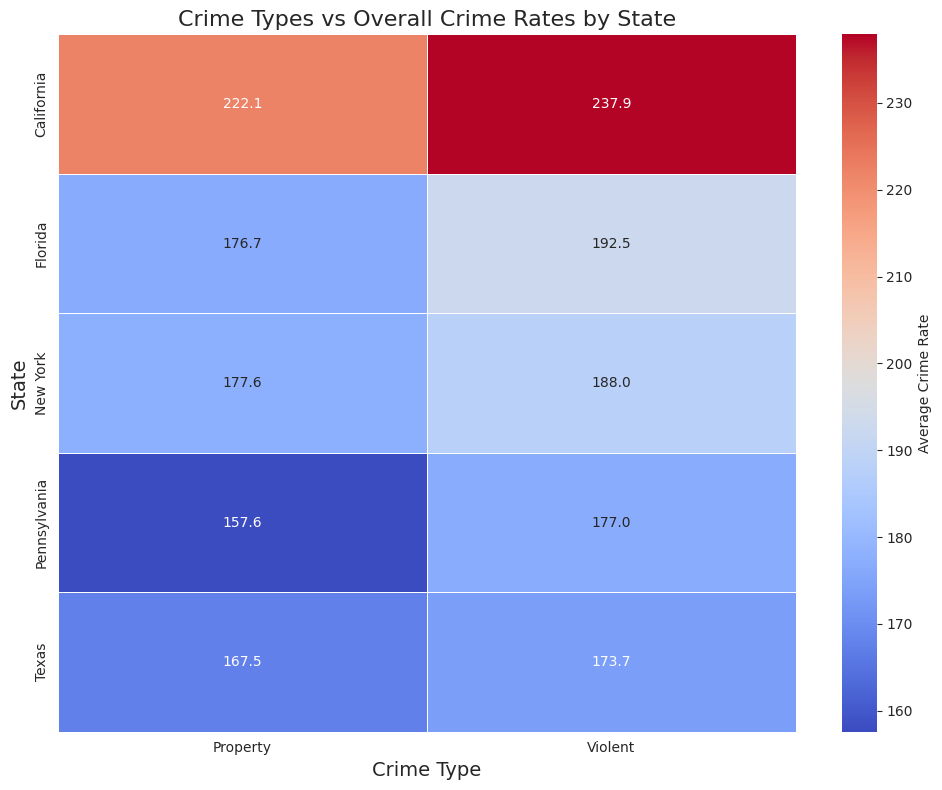

In [65]:
# States will be on the y-axis, crime types on the x-axis, and the values will be the average crime rates
crime_rate_pivot = data.pivot_table(values='Crime_Rate', index='State', columns='Crime_Type', aggfunc='mean')

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(crime_rate_pivot, annot=True, fmt=".1f", linewidths=.5, cmap='coolwarm', cbar_kws={'label': 'Average Crime Rate'}) # Creating the heatmap, with crime rate

# Adding titles and labels
plt.title('Crime Types vs Overall Crime Rates by State', fontsize=16)
plt.xlabel('Crime Type', fontsize=14)
plt.ylabel('State', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust graph to fit
plt.show()

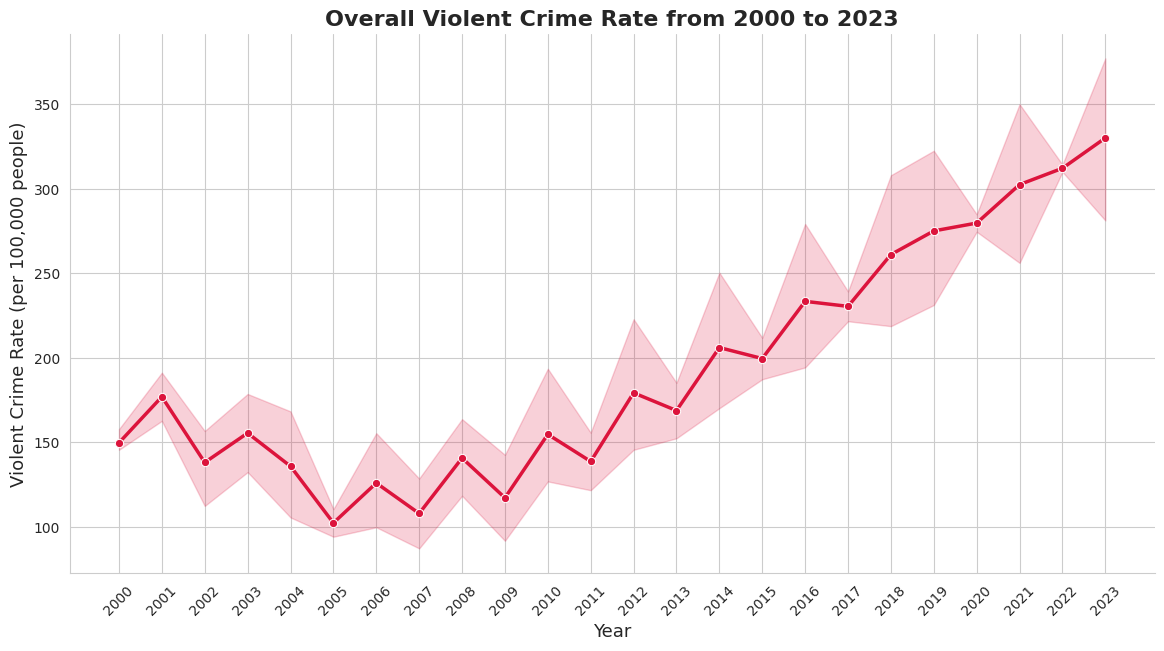

In [72]:
# Questions of A. Hannings.
# 1. How has the overall violent crime rate changed in from 2000 to 2023? (Line chart)

violent_crime_data = data[data['Crime_Type'] == 'Violent'] # Filtering data for violent crimes only
sns.set_style("whitegrid") # For making visualization modern

# Creating the line chart for violent crime rate over the years | Thanks to DataCamp
plt.figure(figsize=(14, 7))
line_chart = sns.lineplot(x='Date', y='Crime_Rate', data=violent_crime_data,
                          marker='o', color='crimson', linewidth=2.5)

# Adding titles and labels
plt.title('Overall Violent Crime Rate from 2000 to 2023', fontsize=16, fontweight='bold') # Title of Visualization
plt.xlabel('Year', fontsize=13) # Title of X-Axis
plt.ylabel('Violent Crime Rate (per 100,000 people)', fontsize=13) # Title of Y-Axis

# Improve the ticks on x-axis for better readability
plt.xticks(ticks=violent_crime_data['Date'].unique(), rotation=45)

sns.despine() # remove despines
plt.show()


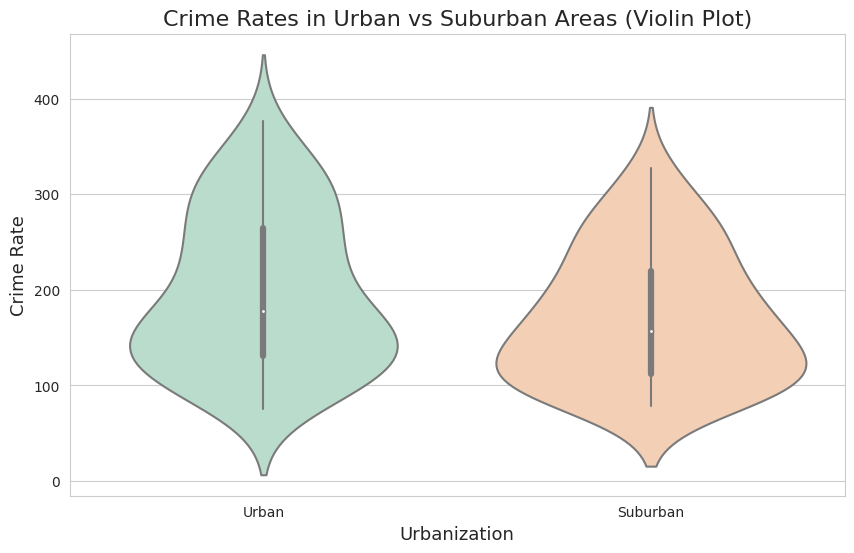

In [21]:
# Fecrin4
plt.figure(figsize=(10, 6))
sns.violinplot(x='Urbanization', y='Crime_Rate', data=data, palette='Pastel2') # Creating Violin plot with choosen palette

plt.title('Crime Rates in Urban vs Suburban Areas (Violin Plot)', fontsize=16) # Adding title and label names
plt.xlabel('Urbanization', fontsize=13)
plt.ylabel('Crime Rate', fontsize=13)

plt.show()

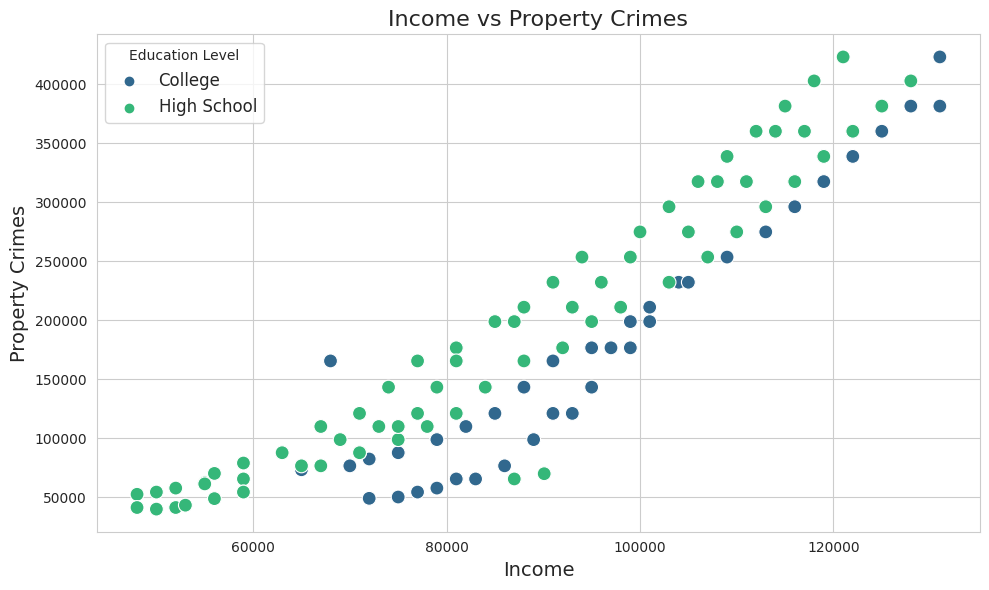

In [26]:
# Scatter plot for Income vs Property Crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Property_Crimes', data=data, hue='Education_Level', palette='viridis', s=100) # Creating scatter plot
plt.title('Income vs Property Crimes', fontsize=16) # Title
plt.xlabel('Income', fontsize=14) # X Label
plt.ylabel('Property Crimes', fontsize=14) # Y Label
plt.legend(title='Education Level', fontsize=12) # Sol üstteki (Upper left)
plt.tight_layout() # Arrangement looks
plt.show()

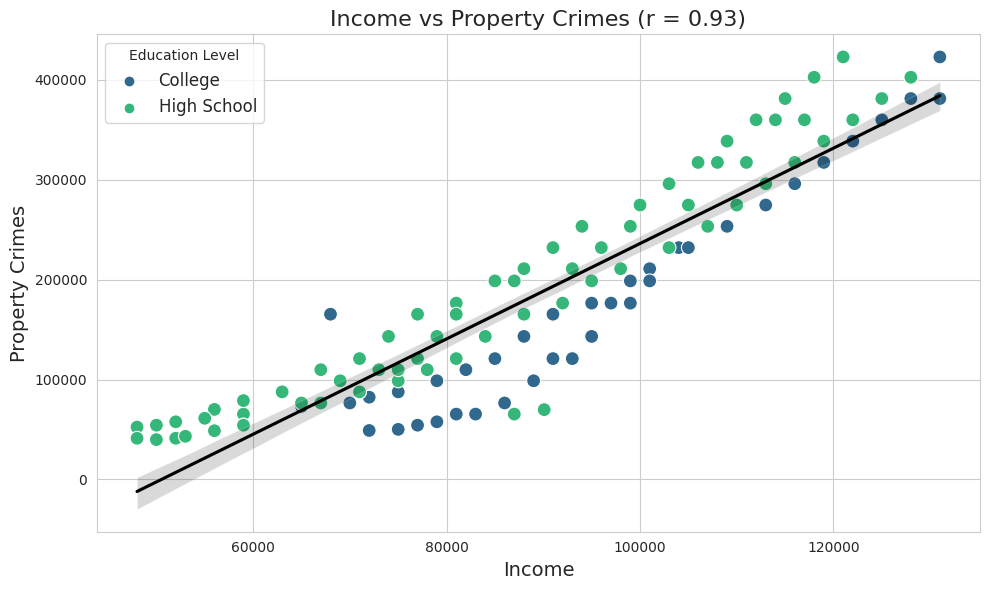

In [27]:
correlation = data['Income'].corr(data['Property_Crimes']) # Calculating the correlation coefficient

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Income', y='Property_Crimes', data=data, hue='Education_Level', palette='viridis', s=100) # Creating the scatter plot

# Adding a line of best fit (CHATGPT)
sns.regplot(x='Income', y='Property_Crimes', data=data, scatter=False, color='black')

# Adding titles, labels, and correlation coefficient
plt.title(f'Income vs Property Crimes (r = {correlation:.2f})', fontsize=16) #CORRCOEF COMES FROM CHATGPT
plt.xlabel('Income', fontsize=14)
plt.ylabel('Property Crimes', fontsize=14)
plt.legend(title='Education Level', fontsize=12)
plt.tight_layout()
plt.show()

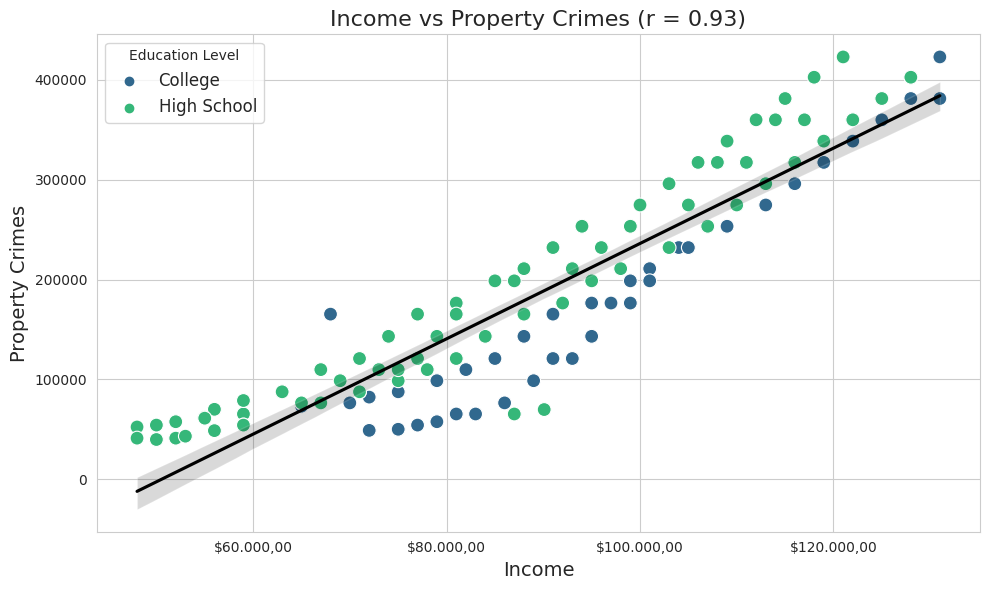

In [80]:
from matplotlib.ticker import FuncFormatter

# Function to format the income on the x-axis
def income_formatter(x, pos):
    # Format the number with a dollar sign, comma as the decimal point, and period as the thousands separator
    return f'${x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Calculate the correlation coefficient
correlation = data['Income'].corr(data['Property_Crimes'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    x='Income',
    y='Property_Crimes',
    data=data,
    hue='Education_Level',
    palette='viridis',
    s=100
)

# Add a line of best fit
sns.regplot(
    x='Income',
    y='Property_Crimes',
    data=data,
    scatter=False,
    color='black'
)

# Set the title and labels, including the correlation coefficient
plt.title(f'Income vs Property Crimes (r = {correlation:.2f})', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Property Crimes', fontsize=14)

# Set the custom formatter for the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(income_formatter))

plt.legend(title='Education Level', fontsize=12)
plt.tight_layout()
plt.show()

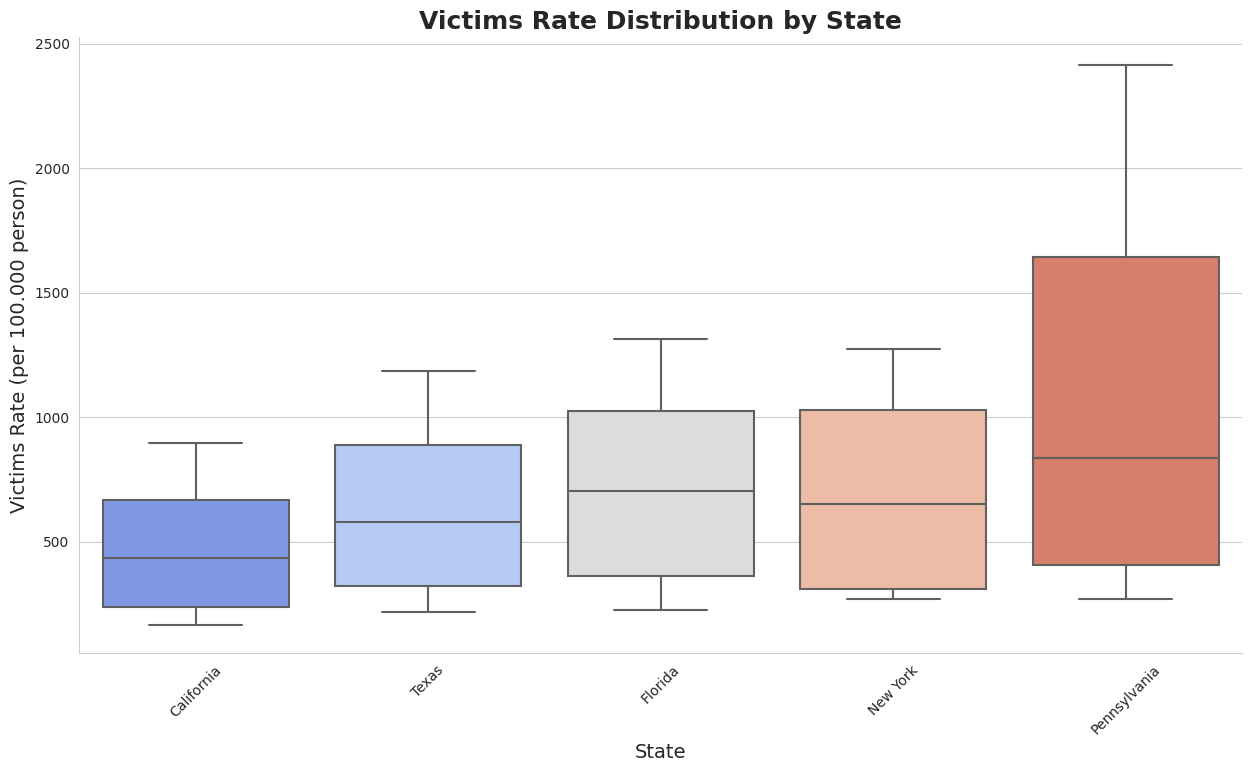

In [36]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='State', y='Victims_Rate', data=data, whis=1.5, palette='coolwarm') #creating box-plot
plt.title('Victims Rate Distribution by State', fontsize=18, fontweight='bold') # title of box plot
plt.xlabel('State', fontsize=14) # x label of box plot
plt.ylabel('Victims Rate (per 100.000 person)', fontsize=14) # y label of box plot
plt.xticks(rotation=45) # 45 degree rotation
sns.despine()
plt.show()

#TRYING TO FIND VISUALIZATIONS
## IT IS EXTRA DO NOT EVALUATE THESE.

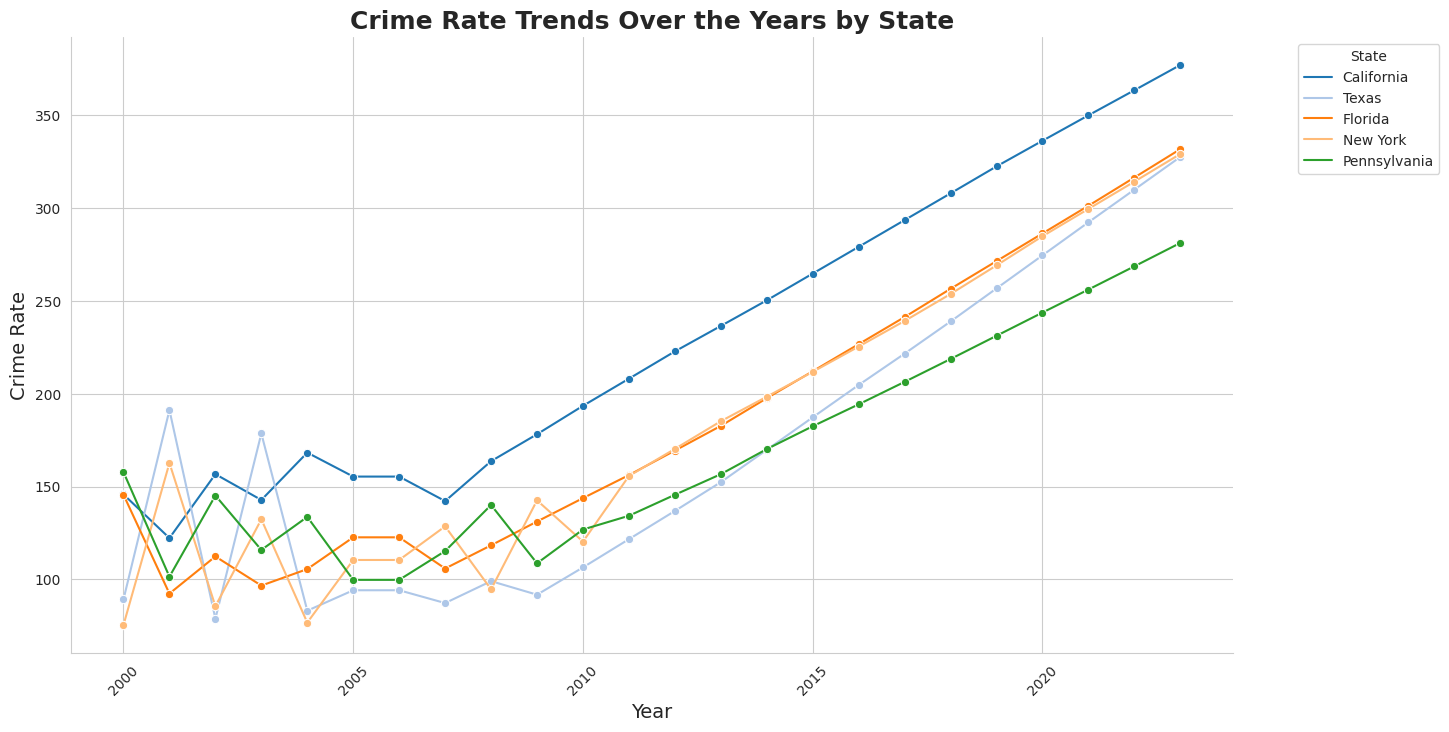

In [31]:
### WE DO NOT USE THIS LINE BECAUSE WE USE ANOTHER ONE ###
### WE DO NOT USE THIS LINE BECAUSE WE USE ANOTHER ONE ###
### WE DO NOT USE THIS LINE BECAUSE WE USE ANOTHER ONE ###

plt.figure(figsize=(15, 8))
sns.lineplot(x='Date', y='Crime_Rate', hue='State', data=data, palette='tab20', marker='o') # line chart creating
plt.title('Crime Rate Trends Over the Years by State', fontsize=18, fontweight='bold') #title of line
plt.xlabel('Year', fontsize=14) # x axis
plt.ylabel('Crime Rate', fontsize=14) # y axis
plt.xticks(rotation=45) # rotate 45 x axis
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc=2) # implementation legends
sns.despine()
plt.show()

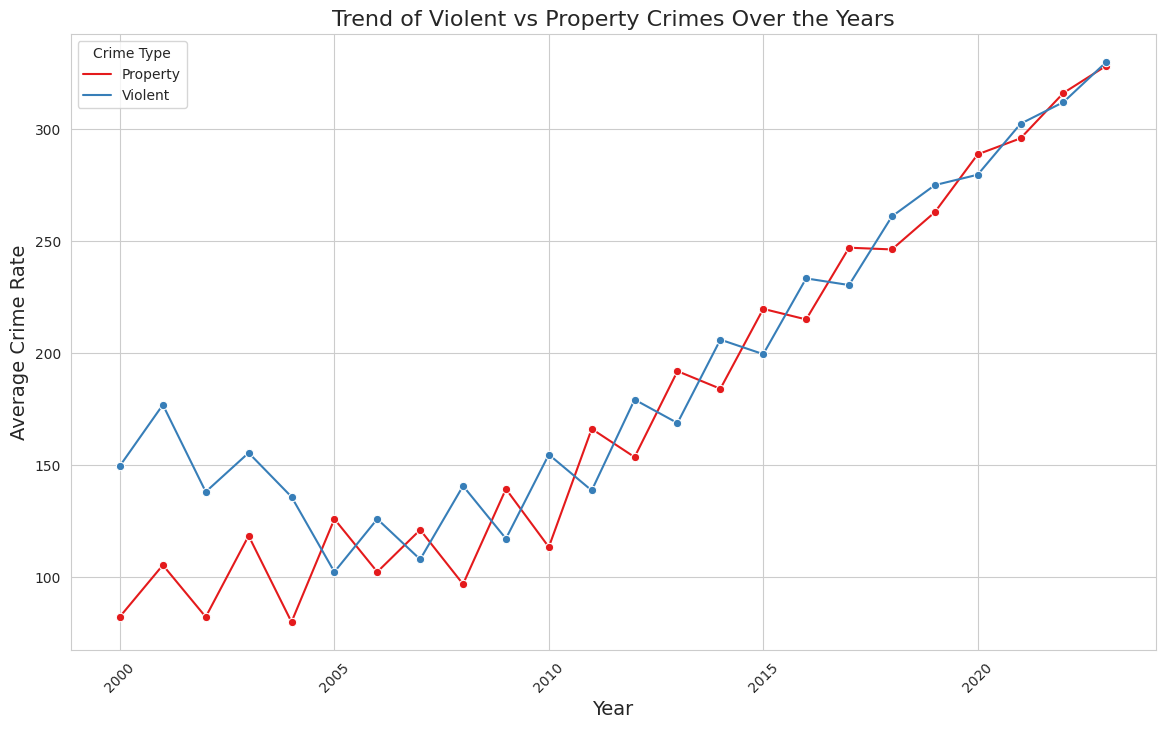

In [ ]:
### WE DO NOT USE THIS LINE BECAUSE WE USE ANOTHER ONE ###
### WE DO NOT USE THIS LINE BECAUSE WE USE ANOTHER ONE ###
### WE DO NOT USE THIS LINE BECAUSE WE USE ANOTHER ONE ###
crime_trends = data.groupby(['Date', 'Crime_Type'])['Crime_Rate'].mean().reset_index() # Preparing the data: filtering and grouping by year and crime type

sns.set_style("whitegrid") # Setting the aesthetic style of the plots

plt.figure(figsize=(14, 8))
line_chart = sns.lineplot(x='Date', y='Crime_Rate', hue='Crime_Type', data=crime_trends, marker='o', palette='Set1') # Creating the line chart

# Adding titles and labels
plt.title('Trend of Violent vs Property Crimes Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Crime Rate', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Crime Type')

# Show the plot
plt.show()

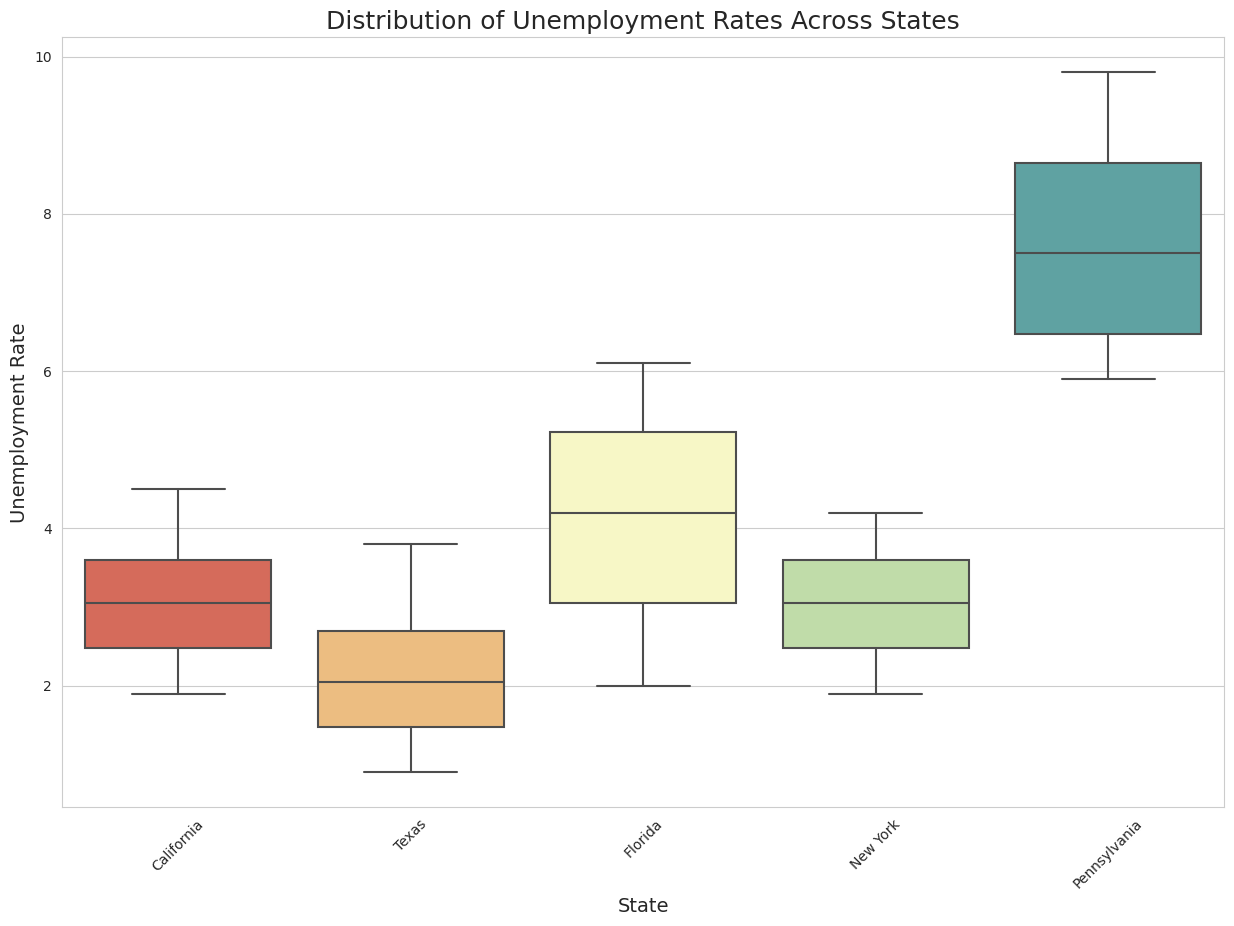

In [ ]:
# WE CAN TRY TO USE THIS IT IS GOOD #
####### BUT WE DID NOT YET ##########
plt.figure(figsize=(15, 10))
box_plot = sns.boxplot(x='State', y='Unemployment_Rate', data=data, palette='Spectral') # Creating the box plot


plt.title('Distribution of Unemployment Rates Across States', fontsize=18) # Adding title
plt.xlabel('State', fontsize=14) # Adding label x
plt.ylabel('Unemployment Rate', fontsize=14) # Adding label y
plt.xticks(rotation=45) # X rotated 45 degree

# Show the plot
plt.show()

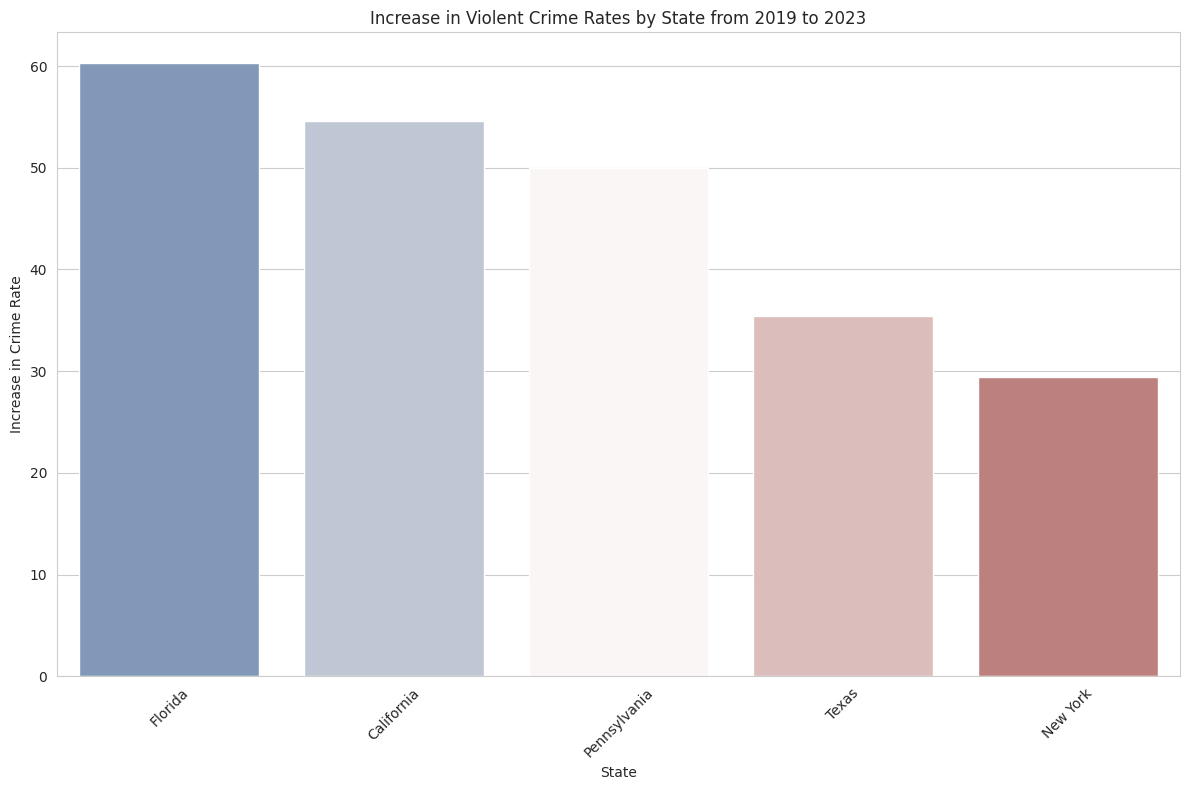

In [69]:
### WE DO NOT USE THIS GRAPH ###
### WE DO NOT USE THIS GRAPH ###
### WE DO NOT USE THIS GRAPH ###
# Which states experienced the higher increase in violent crime rates in 5 years from 2019 to 2023?

data_recent = data[(data['Date'] >= 2019) & (data['Date'] <= 2023) & (data['Crime_Type'] == 'Violent')] # Filtering data 2019 to 2023


crime_rate_diff = data_recent.groupby('State')['Crime_Rate'].agg(['first', 'last']) #CHATGPT HELPS US AND IT SAYS
crime_rate_diff['Increase'] = crime_rate_diff['last'] - crime_rate_diff['first'] # Calculate the difference in crime rates for each state from 2019 to 2023

crime_rate_diff = crime_rate_diff.sort_values('Increase', ascending=False).reset_index() # Sorting in ascending order and reset

plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='Increase', data=crime_rate_diff, palette='vlag') # Create the bar plot

plt.title('Increase in Violent Crime Rates by State from 2019 to 2023') # Add title
plt.xlabel('State') # Add label x
plt.ylabel('Increase in Crime Rate') # Add label y

plt.xticks(rotation=45)  # Rotate x-axis for better readability
plt.tight_layout()  # Adjust the layout
plt.show()